In [4]:
#initialize accounts
import requests
import json

customerId = "59fdd834a73e4942cdafe6e7"
apiKey = "8d321601bf805362b1df611430d1dc02"

url = 'http://api.reimaginebanking.com/customers/{}/accounts?key={}'.format(customerId,apiKey)

#create an account
payload = {
  "type": "Checking",
  "nickname": "test",
  "rewards": 10000,
  "balance": 10000,	
}

response = requests.post( 
    url, 
    data=json.dumps(payload),
    headers={'content-type':'application/json'}
    )

if response.status_code == 201:
    print('account created')
    
response = requests.get(
    url,
    customerId
    ).text
response = json.loads(response)
accountId = response[0]['_id']

print(response)

account created
[{u'rewards': 10000, u'customer_id': u'59fdd834a73e4942cdafe6e7', u'nickname': u'test', u'balance': 10000, u'_id': u'59ff0f9db390353c953a21a8', u'type': u'Checking'}]


In [5]:
#create merchants
url = "http://api.reimaginebanking.com/merchants?key={}".format(apiKey)
merchant = {
    "name": "Shopping Merchant",
    "category": [
        "shopping"
    ],
    "address": {
      "street_number": "string",
      "street_name": "string",
      "city": "string",
      "state": "MD",
      "zip": "12345"
    },
    "geocode": {
      "lat": 0,
      "lng": 0
    }
}

response = requests.post(url, data=json.dumps(merchant), headers={'content-type':'application/json'}).text
response = json.loads(response)
print(response)
merchantIds = {}
merchantIds["Shopping"] = response['objectCreated']['_id']
print(merchantIds)

merchant = {
    "name": "Grocery Merchant",
    "category": [
        "groceries"
    ],
    "address": {
      "street_number": "string",
      "street_name": "string",
      "city": "string",
      "state": "MD",
      "zip": "12345"
    },
    "geocode": {
      "lat": 0,
      "lng": 0
    }
}

response = requests.post(url, data=json.dumps(merchant), headers={'content-type':'application/json'}).text
response = json.loads(response)
print(response)
merchantIds["Grocery"] = response["objectCreated"]["_id"]
print(merchantIds)

merchant = {
    "name": "Entertainment Merchant",
    "category": [
        "entertainment"
    ],
    "address": {
      "street_number": "string",
      "street_name": "string",
      "city": "string",
      "state": "MD",
      "zip": "12345"
    },
    "geocode": {
      "lat": 0,
      "lng": 0
    }
}

response = requests.post(url, data=json.dumps(merchant), headers={'content-type':'application/json'}).text
response = json.loads(response)
print(response)
merchantIds["Entertainment"] = response["objectCreated"]["_id"]
print(merchantIds)

{u'message': u'Created merchant', u'code': 201, u'objectCreated': {u'category': [u'shopping'], u'name': u'Shopping Merchant', u'creation_date': u'2017-11-05', u'geocode': {u'lat': 0, u'lng': 0}, u'address': {u'city': u'string', u'street_name': u'string', u'state': u'MD', u'zip': u'12345', u'street_number': u'string'}, u'_id': u'59ff0fa0b390353c953a21a9'}}
{'Shopping': u'59ff0fa0b390353c953a21a9'}
{u'message': u'Created merchant', u'code': 201, u'objectCreated': {u'category': [u'groceries'], u'name': u'Grocery Merchant', u'creation_date': u'2017-11-05', u'geocode': {u'lat': 0, u'lng': 0}, u'address': {u'city': u'string', u'street_name': u'string', u'state': u'MD', u'zip': u'12345', u'street_number': u'string'}, u'_id': u'59ff0fa0b390353c953a21aa'}}
{'Grocery': u'59ff0fa0b390353c953a21aa', 'Shopping': u'59ff0fa0b390353c953a21a9'}
{u'message': u'Created merchant', u'code': 201, u'objectCreated': {u'category': [u'entertainment'], u'name': u'Entertainment Merchant', u'creation_date': u'2017

In [6]:
#create purchases
url = 'http://api.reimaginebanking.com/accounts/{}/purchases?key={}'.format(accountId,apiKey)

#random generated mock data, aggregated by month for simplicity
shopping = [82, 98, 94, 75, 88, 75, 94, 87, 94, 72, 98, 77, 96, 83, 97, 73, 71, 84, 98, 84, 85, 75, 86, 83, 97, 92, 84, 74, 74, 100, 88, 76, 95, 76]
groceries = [46, 31, 38, 33, 41, 45, 50, 45, 33, 39, 41, 43, 44, 50, 49, 34, 33, 50, 33, 50, 32, 42, 32, 32, 37, 46, 44, 36, 32, 37, 33, 34, 40, 40]
entertainment = [90, 88, 97, 80, 104, 82, 71, 104, 93, 88, 98, 72, 111, 80, 70, 91, 110, 91, 80, 90, 110, 85, 85, 99, 105, 93, 80, 107, 99, 87, 112, 82, 86, 92]
for i in range(len(shopping)):
    purchase = {
        "amount": shopping[i],
        "medium" : "balance",
        "merchant_id": merchantIds["Shopping"]
    }
    requests.post(
        url,
        data = json.dumps(purchase),
        headers={'content-type':'application/json'}
    )

for i in range(len(groceries)):
    purchase = {
        "amount": groceries[i],
        "medium" : "balance",
        "merchant_id": merchantIds["Grocery"]
    }
    requests.post(
        url,
        data = json.dumps(purchase),
        headers={'content-type':'application/json'}
    )

for i in range(len(entertainment)):
    purchase = {
        "amount": entertainment[i],
        "medium" : "balance",
        "merchant_id": merchantIds["Entertainment"]
    }
    requests.post(
        url,
        data = json.dumps(purchase),
        headers={'content-type':'application/json'}
    )

#create bills
url = 'http://api.reimaginebanking.com/accounts/{}/bills?key={}'.format(accountId,apiKey)
#mock data payments randomly generated
bills= [50, 55, 56, 51, 53, 51, 59, 53, 50, 55, 55, 59, 57, 52, 59, 50, 57, 50, 59, 52, 58, 58, 58, 51, 54, 51, 57, 60, 55, 57, 57, 51, 54, 53]
for i in range(len(bills)):
    bill = {
        "nickname": "Bill",
        "payment_amount": bills[i],
        "status": "completed",
        "payee": "Utilities"
    }
    requests.post(
        url,
        data = json.dumps(bill),
        headers={'content-type':'application/json'}
    )

In [7]:
#parse through mock data to extract amounts paid into arrays categorized by selected merchant categories
#purchases
url = 'http://api.reimaginebanking.com/accounts/{}/purchases?key={}'.format(accountId,apiKey)
purchases = requests.get(url).text
purchases = json.loads(purchases)
extractedShopping = []
extractedGroceries = []
extractedEntertainment = []

for purchase in purchases:
    merchant = requests.get(
        url='http://api.reimaginebanking.com/merchants/{}?key={}'.format(purchase['merchant_id'], apiKey)
    ).text
    merchant = json.loads(merchant)
    if "shopping" in merchant["category"]:
        extractedShopping.append(purchase["amount"])
    elif "groceries" in merchant["category"]:
        extractedGroceries.append(purchase["amount"])
    elif "entertainment" in merchant["category"]:
        extractedEntertainment.append(purchase["amount"])

#bills
url = 'http://api.reimaginebanking.com/accounts/{}/bills?key={}'.format(accountId,apiKey)
bills = requests.get(url).text
bills = json.loads(bills)
extractedBills = []
for bill in bills:
    extractedBills.append(bill["payment_amount"])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


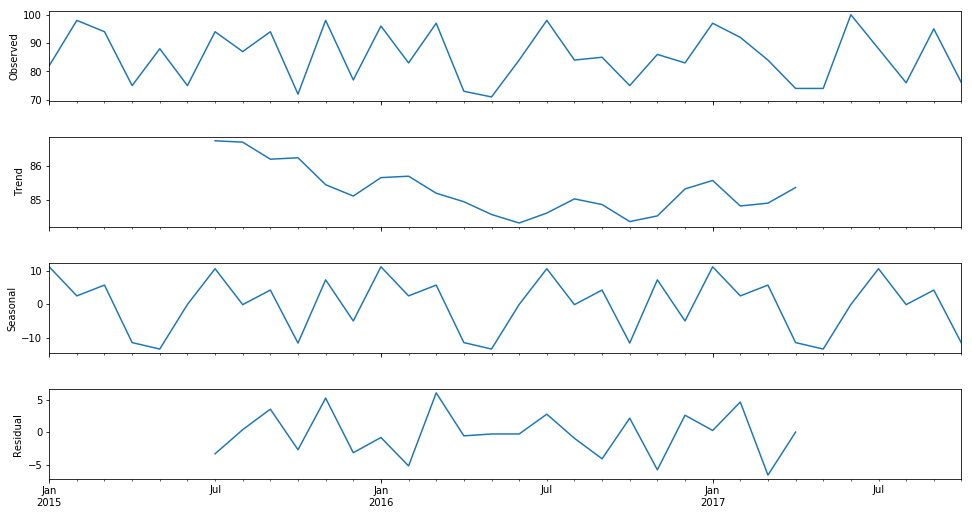

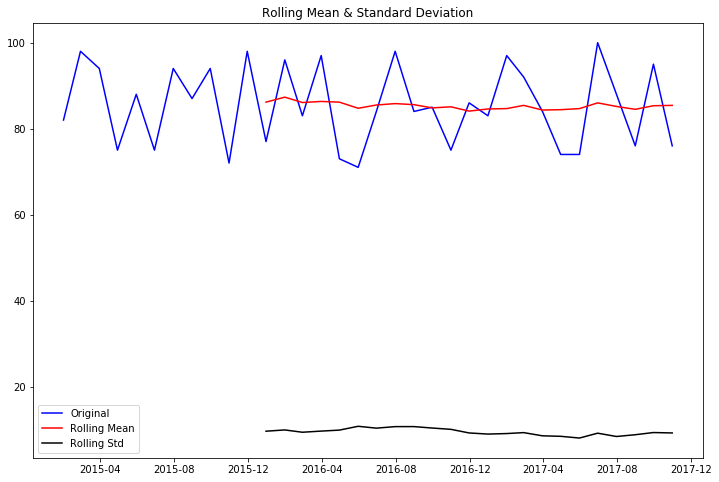

Results of Dickey-Fuller Test:
Test Statistic                 -1.830477
p-value                         0.365439
#Lags Used                      8.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
dtype: float64


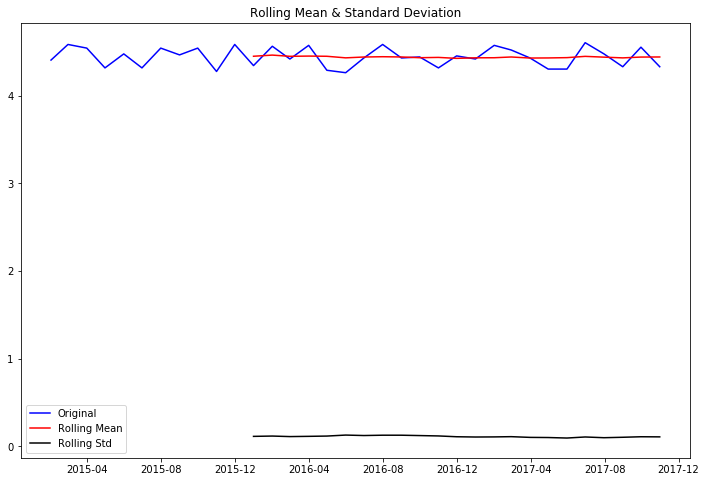

Results of Dickey-Fuller Test:
Test Statistic                 -1.940171
p-value                         0.313406
#Lags Used                      8.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
dtype: float64


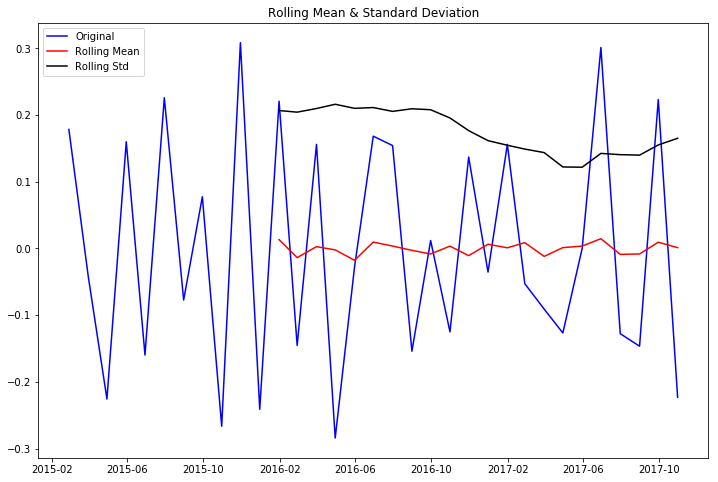

Results of Dickey-Fuller Test:
Test Statistic                 -2.520272
p-value                         0.110619
#Lags Used                     10.000000
Number of Observations Used    22.000000
Critical Value (5%)            -3.005426
Critical Value (1%)            -3.769733
Critical Value (10%)           -2.642501
dtype: float64


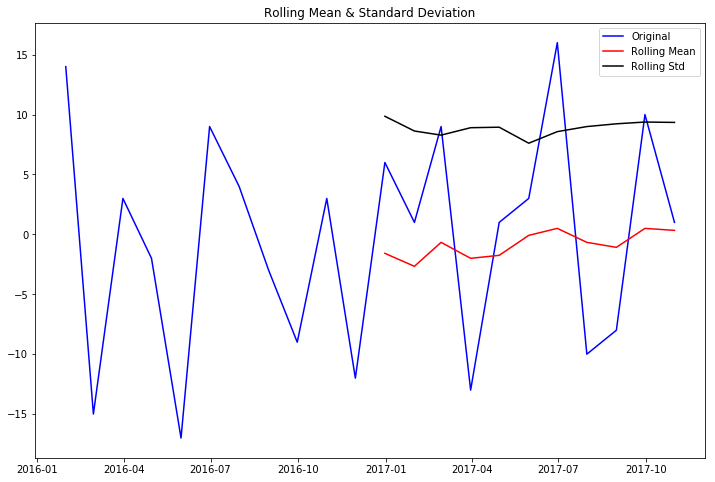

Results of Dickey-Fuller Test:
Test Statistic                -1.207397e+01
p-value                        2.313054e-22
#Lags Used                     9.000000e+00
Number of Observations Used    1.200000e+01
Critical Value (5%)           -3.154972e+00
Critical Value (1%)           -4.137829e+00
Critical Value (10%)          -2.714477e+00
dtype: float64


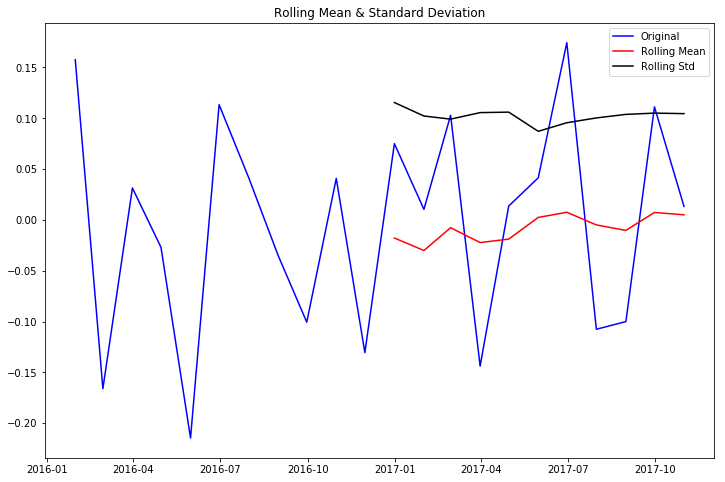

Results of Dickey-Fuller Test:
Test Statistic                -1.763349e+01
p-value                        3.788526e-30
#Lags Used                     9.000000e+00
Number of Observations Used    1.200000e+01
Critical Value (5%)           -3.154972e+00
Critical Value (1%)           -4.137829e+00
Critical Value (10%)          -2.714477e+00
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                           shopping   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -118.737
Date:                            Sun, 05 Nov 2017   AIC                            243.474
Time:                                    09:46:03   BIC                            248.053
Sample:                                01-31-2015   HQIC                           245.036
                                     - 10-31-2017                                         
Covarianc

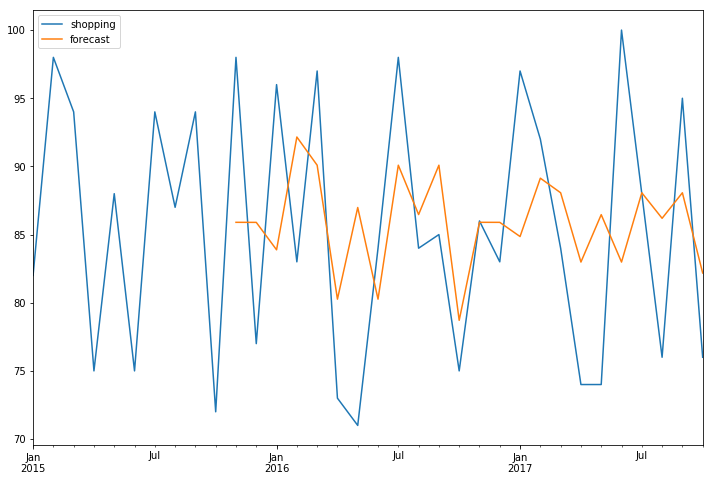

In [45]:
#Shopping category spending prediction
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

dates = pd.date_range('1/1/2015', periods=34, freq="M")
data = pd.DataFrame(extractedShopping, columns=['shopping'], index = dates)
#data.index = pd.DatetimeIndex(freq='w')

dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv("D:/capital_one_nessie_data.csv", parse_dates=['month'], index_col=['month'], date_parser=dateparse)

decomposition = seasonal_decompose(data.shopping, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

test_stationarity(data.shopping)

data.shopping_log= data.shopping.apply(lambda x: np.log(x))
test_stationarity(data.shopping_log)

data['log_first_difference'] = data.shopping_log - data.shopping_log.shift(1)
test_stationarity(data.log_first_difference.dropna(inplace=False))

data['seasonal_difference'] = data.shopping - data.shopping.shift(12)
test_stationarity(data.seasonal_difference.dropna(inplace=False))

data['log_seasonal_difference'] = data.shopping_log - data.shopping_log.shift(12)
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

mod = sm.tsa.statespace.SARIMAX(data.shopping, trend='n', order=(0,1,1), seasonal_order=(1,0,0,12))
results = mod.fit()
print results.summary()

data['forecast'] = results.predict(start = 10, end= 35, dynamic= True)
#print data['forecast']
data[['shopping', 'forecast']].plot(figsize=(12, 8))
plt.savefig('ts_data_predict.png', bbox_inches='tight')

shoppingForecast = results.forecast()[0]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


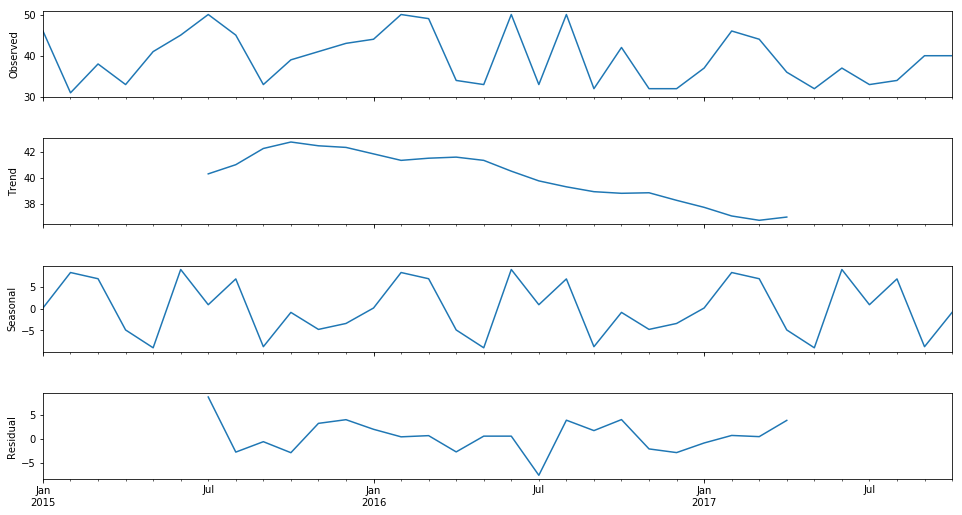

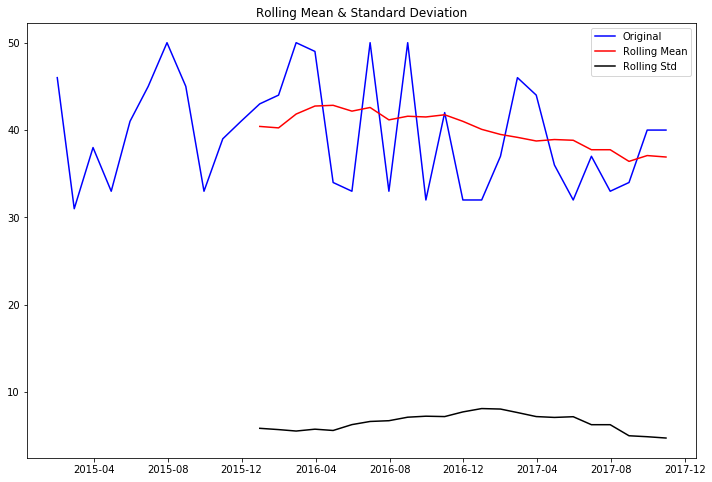

Results of Dickey-Fuller Test:
Test Statistic                 -5.469356
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (5%)            -2.954127
Critical Value (1%)            -3.646135
Critical Value (10%)           -2.615968
dtype: float64


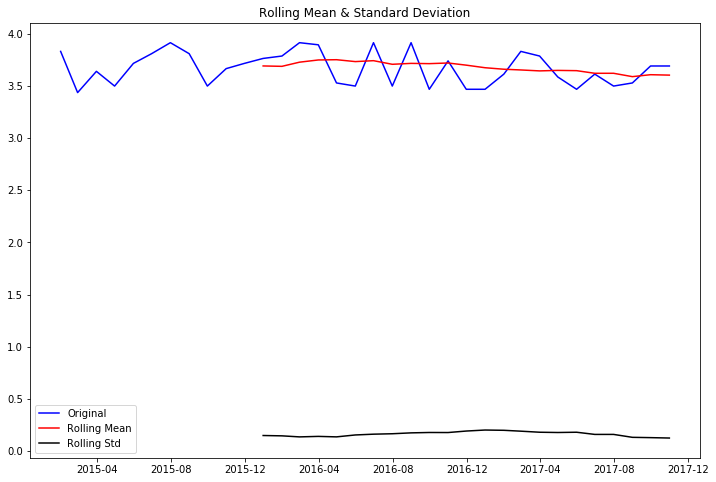

Results of Dickey-Fuller Test:
Test Statistic                 -0.713387
p-value                         0.843252
#Lags Used                      9.000000
Number of Observations Used    24.000000
Critical Value (5%)            -2.992216
Critical Value (1%)            -3.737709
Critical Value (10%)           -2.635747
dtype: float64


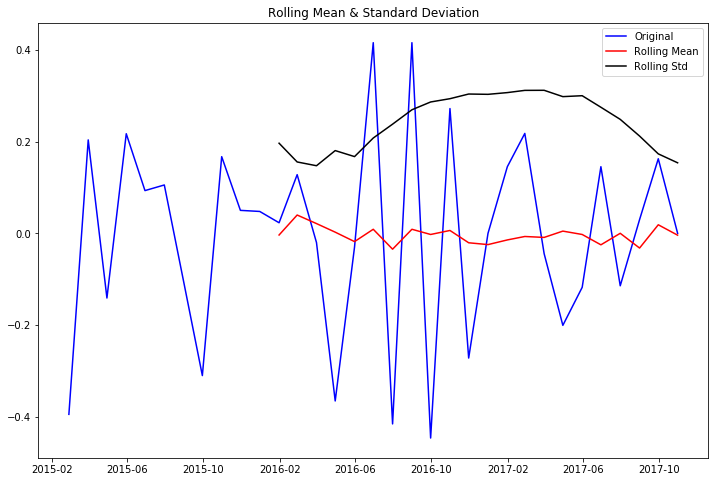

Results of Dickey-Fuller Test:
Test Statistic                 -5.551643
p-value                         0.000002
#Lags Used                      6.000000
Number of Observations Used    26.000000
Critical Value (5%)            -2.981247
Critical Value (1%)            -3.711212
Critical Value (10%)           -2.630095
dtype: float64


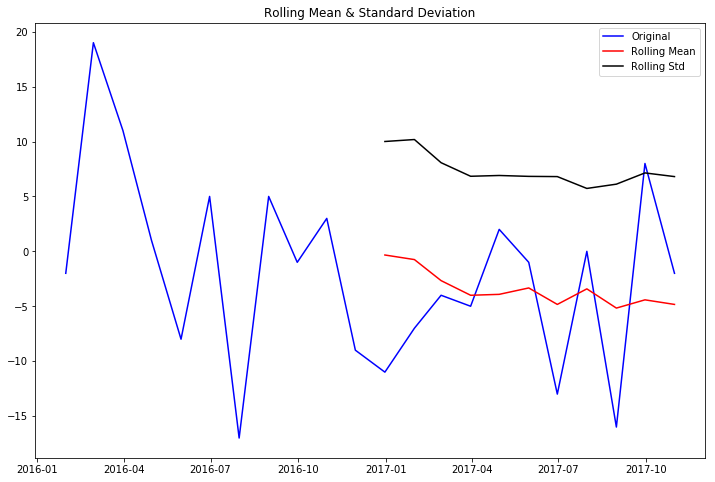

Results of Dickey-Fuller Test:
Test Statistic                 -0.821322
p-value                         0.812779
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (5%)            -3.154972
Critical Value (1%)            -4.137829
Critical Value (10%)           -2.714477
dtype: float64


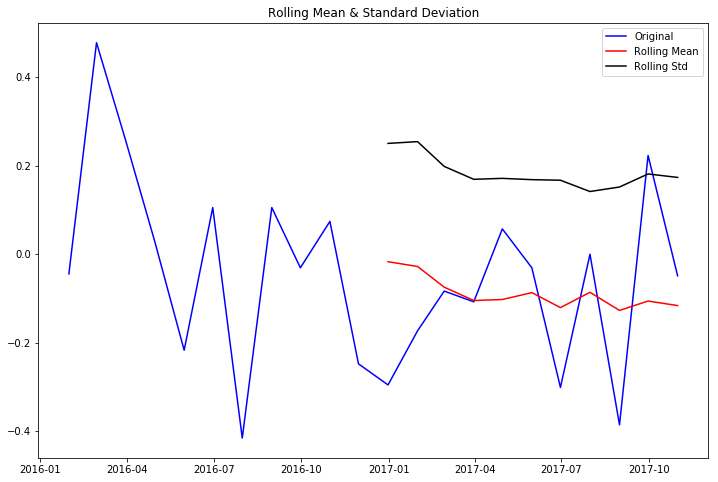

Results of Dickey-Fuller Test:
Test Statistic                 -1.595749
p-value                         0.485728
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (5%)            -3.154972
Critical Value (1%)            -4.137829
Critical Value (10%)           -2.714477
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                          groceries   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                -109.196
Date:                            Sun, 05 Nov 2017   AIC                            224.391
Time:                                    09:47:16   BIC                            228.970
Sample:                                01-31-2015   HQIC                           225.953
                                     - 10-31-2017                                         
Covariance Type:              

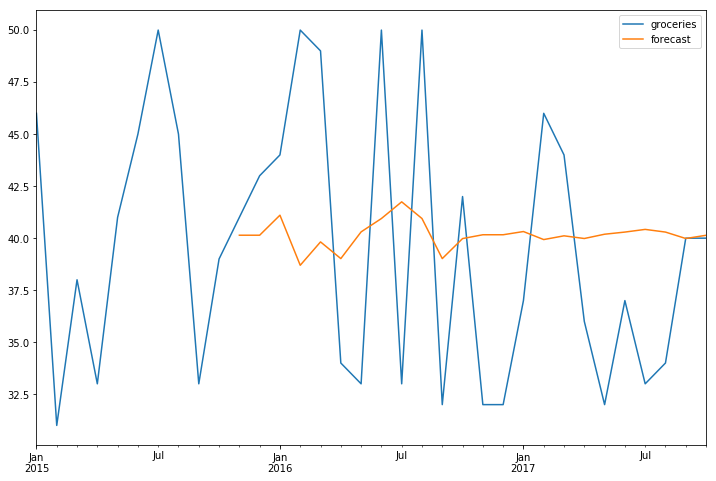

In [46]:
dates = pd.date_range('1/1/2015', periods=34, freq="M")
data = pd.DataFrame(extractedGroceries, columns=['groceries'], index = dates)
#data.index = pd.DatetimeIndex(freq='w')

dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv("D:/capital_one_nessie_data.csv", parse_dates=['month'], index_col=['month'], date_parser=dateparse)

decomposition = seasonal_decompose(data.groceries, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

test_stationarity(data.groceries)

data.groceries_log= data.groceries.apply(lambda x: np.log(x))
test_stationarity(data.groceries_log)

data['log_first_difference'] = data.groceries_log - data.groceries_log.shift(1)
test_stationarity(data.log_first_difference.dropna(inplace=False))

data['seasonal_difference'] = data.groceries - data.groceries.shift(12)
test_stationarity(data.seasonal_difference.dropna(inplace=False))

data['log_seasonal_difference'] = data.groceries_log - data.groceries_log.shift(12)
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

mod = sm.tsa.statespace.SARIMAX(data.groceries, trend='n', order=(0,1,1), seasonal_order=(1,0,0,12))
results = mod.fit()
print results.summary()

data['forecast'] = results.predict(start = 10, end= 35, dynamic= True)
#print data['forecast']
data[['groceries', 'forecast']].plot(figsize=(12, 8))
plt.savefig('ts_data_predict.png', bbox_inches='tight')

groceriesForecast = results.forecast()[0]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


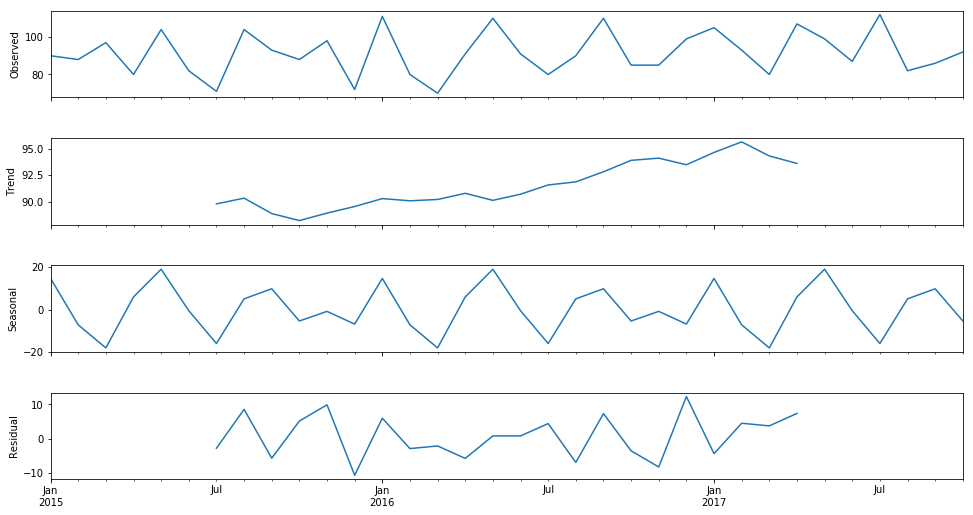

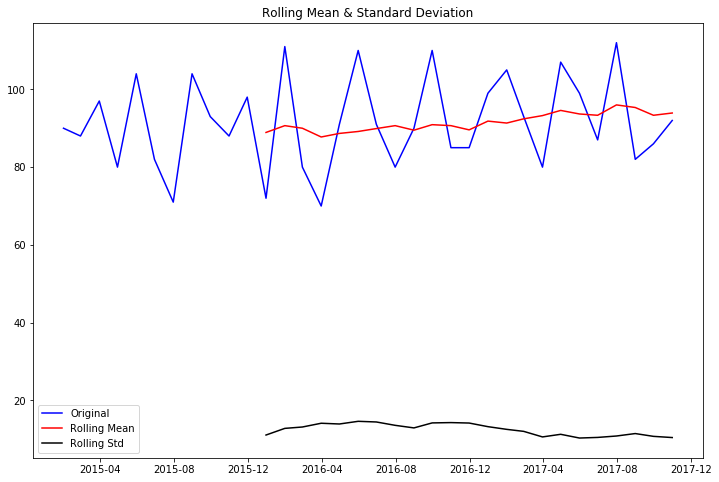

Results of Dickey-Fuller Test:
Test Statistic                -6.927795e+00
p-value                        1.103817e-09
#Lags Used                     1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (5%)           -2.957219e+00
Critical Value (1%)           -3.653520e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


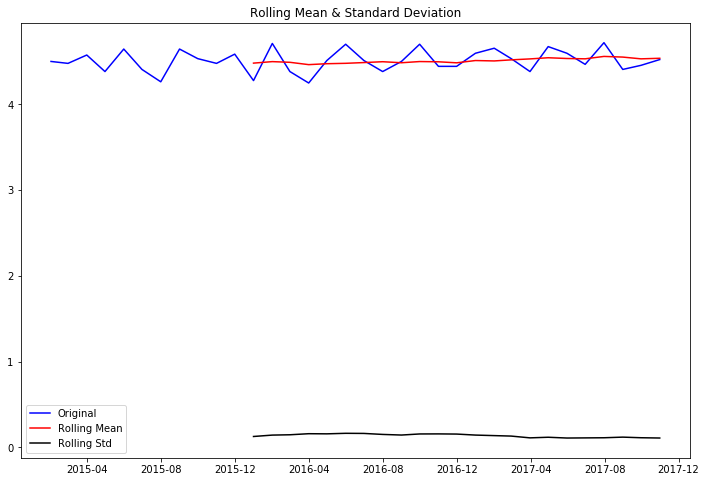

Results of Dickey-Fuller Test:
Test Statistic                -6.682219e+00
p-value                        4.313544e-09
#Lags Used                     1.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (5%)           -2.957219e+00
Critical Value (1%)           -3.653520e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


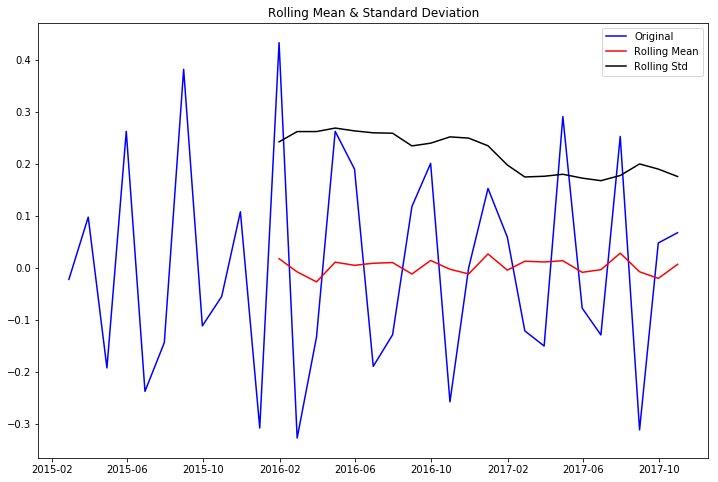

Results of Dickey-Fuller Test:
Test Statistic                -6.783630e+00
p-value                        2.463502e-09
#Lags Used                     3.000000e+00
Number of Observations Used    2.900000e+01
Critical Value (5%)           -2.967882e+00
Critical Value (1%)           -3.679060e+00
Critical Value (10%)          -2.623158e+00
dtype: float64


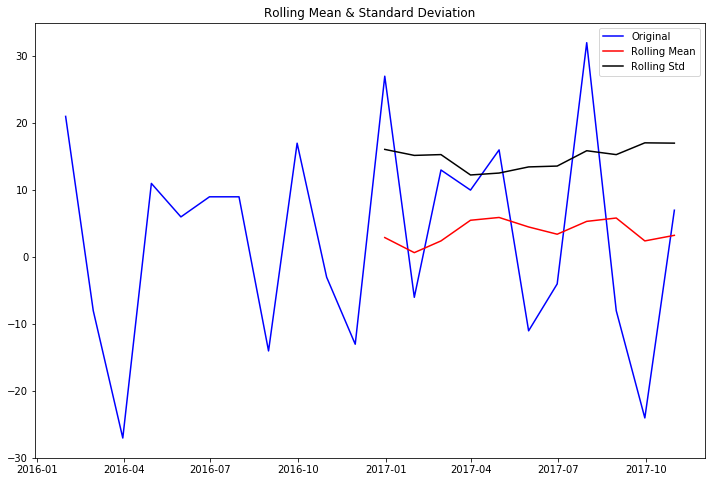

Results of Dickey-Fuller Test:
Test Statistic                 -5.443298
p-value                         0.000003
#Lags Used                      1.000000
Number of Observations Used    20.000000
Critical Value (5%)            -3.021645
Critical Value (1%)            -3.809209
Critical Value (10%)           -2.650713
dtype: float64


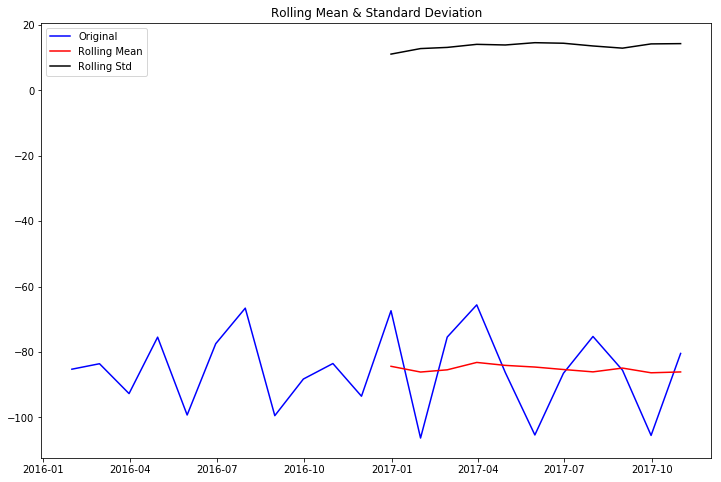

Results of Dickey-Fuller Test:
Test Statistic                 -3.723833
p-value                         0.003790
#Lags Used                      7.000000
Number of Observations Used    14.000000
Critical Value (5%)            -3.104184
Critical Value (1%)            -4.012034
Critical Value (10%)           -2.690987
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                      entertainment   No. Observations:                   34
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -143.298
Date:                            Sun, 05 Nov 2017   AIC                            290.596
Time:                                    09:47:21   BIC                            293.649
Sample:                                01-31-2015   HQIC                           291.637
                                     - 10-31-2017                                         
Covariance Type:              

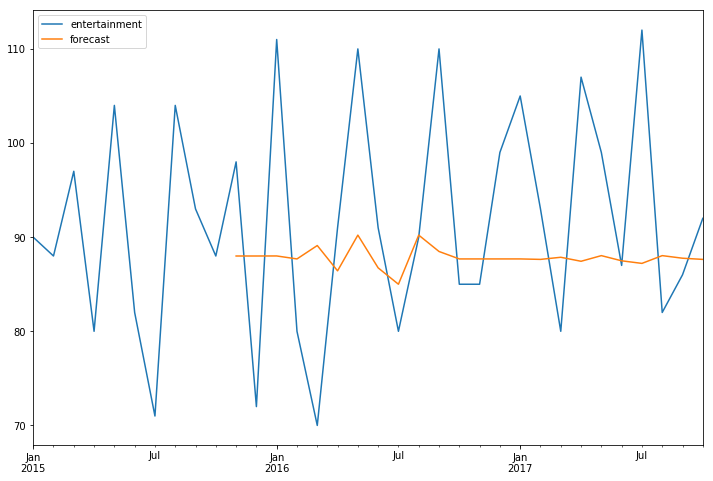

In [47]:
dates = pd.date_range('1/1/2015', periods=34, freq="M")
data = pd.DataFrame(extractedEntertainment, columns=['entertainment'], index = dates)
#data.index = pd.DatetimeIndex(freq='w')

dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv("D:/capital_one_nessie_data.csv", parse_dates=['month'], index_col=['month'], date_parser=dateparse)

decomposition = seasonal_decompose(data.entertainment, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

test_stationarity(data.entertainment)

data.entertainment_log= data.entertainment.apply(lambda x: np.log(x))
test_stationarity(data.entertainment_log)

data['log_first_difference'] = data.entertainment_log - data.entertainment_log.shift(1)
test_stationarity(data.log_first_difference.dropna(inplace=False))

data['seasonal_difference'] = data.entertainment - data.entertainment.shift(12)
test_stationarity(data.seasonal_difference.dropna(inplace=False))

data['log_seasonal_difference'] = data.entertainment_log - data.entertainment.shift(12)
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

mod = sm.tsa.statespace.SARIMAX(data.entertainment, trend='n', order=(0,1,0), seasonal_order=(1,0,0,12))
results = mod.fit()
print results.summary()

data['forecast'] = results.predict(start = 10, end= 35, dynamic= True)
#print data['forecast']
data[['entertainment', 'forecast']].plot(figsize=(12, 8))
plt.savefig('ts_data_predict.png', bbox_inches='tight')

entertainmentForecast = results.forecast()[0]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


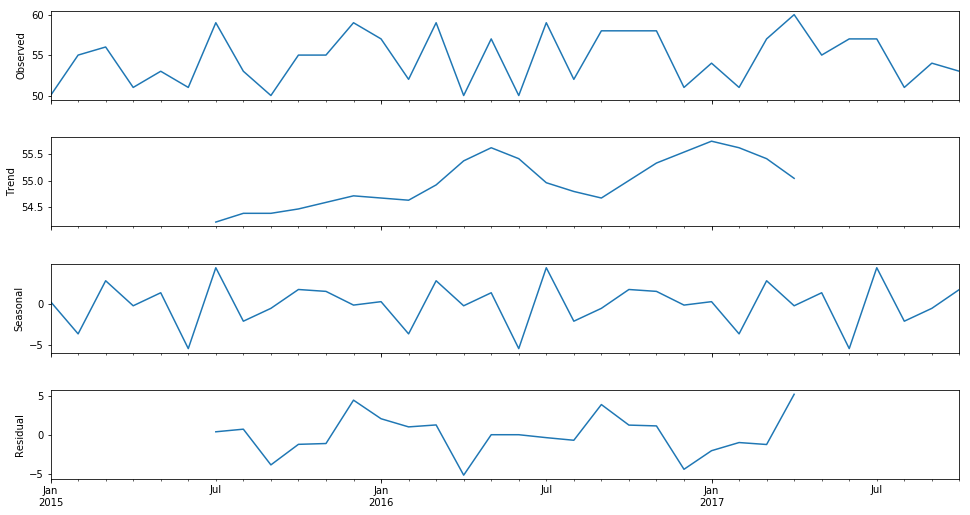

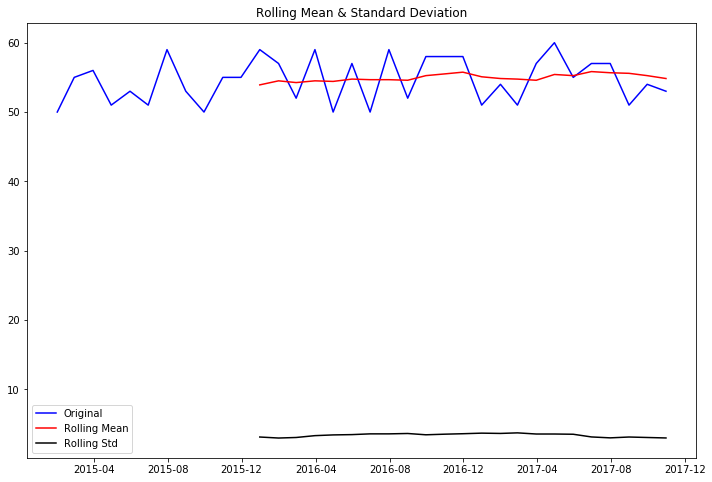

Results of Dickey-Fuller Test:
Test Statistic                 -2.588753
p-value                         0.095344
#Lags Used                      6.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


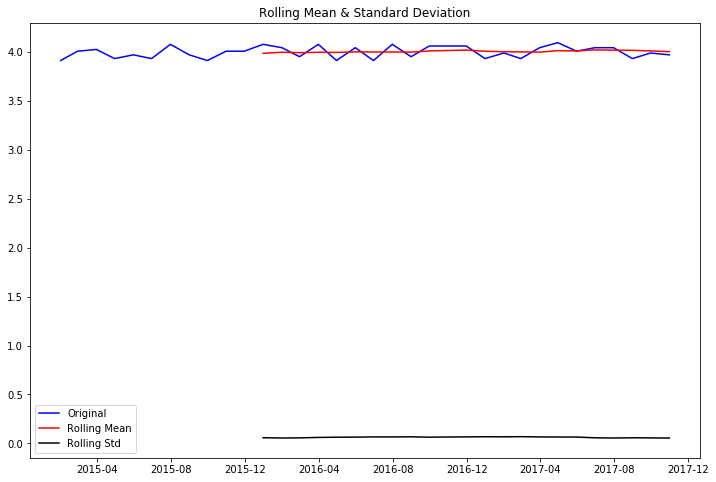

Results of Dickey-Fuller Test:
Test Statistic                 -2.621639
p-value                         0.088607
#Lags Used                      6.000000
Number of Observations Used    27.000000
Critical Value (5%)            -2.976430
Critical Value (1%)            -3.699608
Critical Value (10%)           -2.627601
dtype: float64


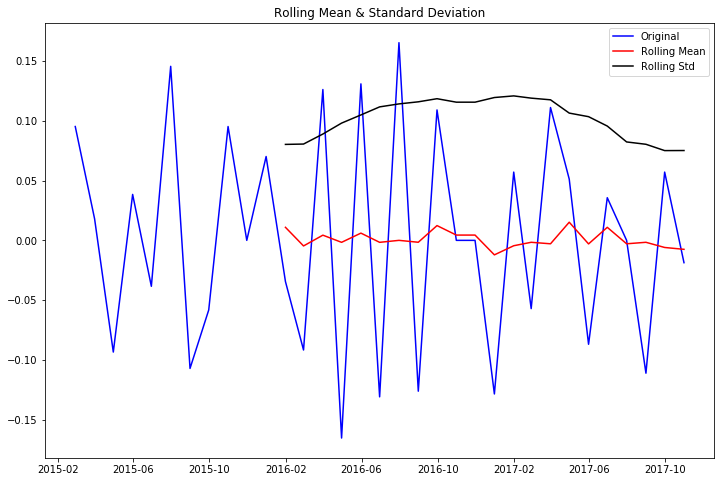

Results of Dickey-Fuller Test:
Test Statistic                 -4.175978
p-value                         0.000723
#Lags Used                      7.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (1%)            -3.723863
Critical Value (10%)           -2.632800
dtype: float64


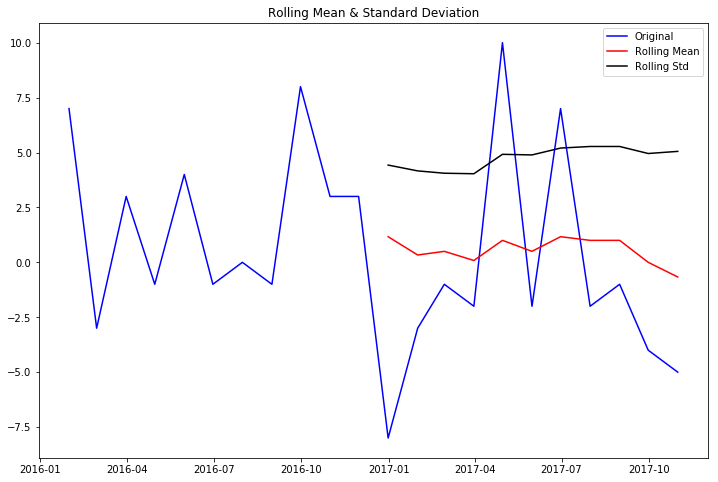

Results of Dickey-Fuller Test:
Test Statistic                 -2.534599
p-value                         0.107281
#Lags Used                      6.000000
Number of Observations Used    15.000000
Critical Value (5%)            -3.084908
Critical Value (1%)            -3.964443
Critical Value (10%)           -2.681814
dtype: float64


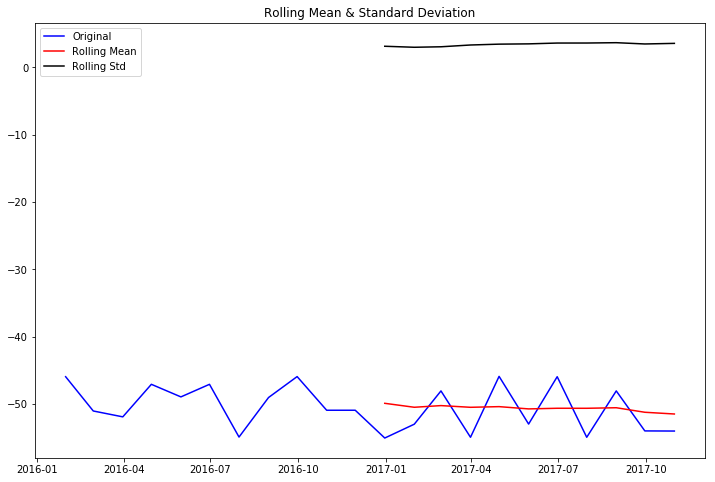

Results of Dickey-Fuller Test:
Test Statistic                 -1.332677
p-value                         0.614093
#Lags Used                      8.000000
Number of Observations Used    13.000000
Critical Value (5%)            -3.127149
Critical Value (1%)            -4.068854
Critical Value (10%)           -2.701730
dtype: float64
                                 Statespace Model Results                                 
Dep. Variable:                              bills   No. Observations:                   34
Model:             SARIMAX(0, 1, 1)x(1, 0, 0, 12)   Log Likelihood                 -87.184
Date:                            Sun, 05 Nov 2017   AIC                            180.369
Time:                                    09:47:35   BIC                            184.948
Sample:                                01-31-2015   HQIC                           181.930
                                     - 10-31-2017                                         
Covariance Type:              

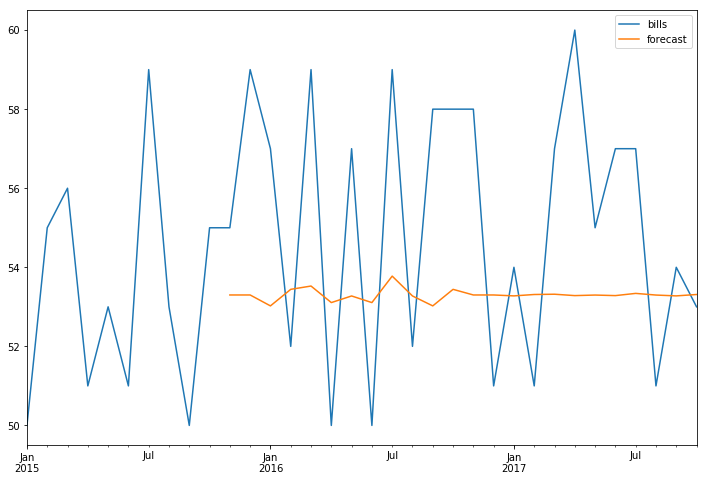

In [48]:
dates = pd.date_range('1/1/2015', periods=34, freq="M")
data = pd.DataFrame(extractedBills, columns=['bills'], index = dates)
#data.index = pd.DatetimeIndex(freq='w')

dateparse = lambda dates:pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv("D:/capital_one_nessie_data.csv", parse_dates=['month'], index_col=['month'], date_parser=dateparse)

decomposition = seasonal_decompose(data.bills, freq=12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

test_stationarity(data.bills)

data.bills_log = data.bills.apply(lambda x: np.log(x))
test_stationarity(data.bills_log)

data['log_first_difference'] = data.bills_log - data.bills_log.shift(1)
test_stationarity(data.log_first_difference.dropna(inplace=False))

data['seasonal_difference'] = data.bills - data.bills.shift(12)
test_stationarity(data.seasonal_difference.dropna(inplace=False))

data['log_seasonal_difference'] = data.bills_log - data.bills.shift(12)
test_stationarity(data.log_seasonal_difference.dropna(inplace=False))

mod = sm.tsa.statespace.SARIMAX(data.bills, trend='n', order=(0,1,1), seasonal_order=(1,0,0,12))
results = mod.fit()
print results.summary()

data['forecast'] = results.predict(start = 10, end= 35, dynamic= True)
#print data['forecast']
data[['bills', 'forecast']].plot(figsize=(12, 8))
plt.savefig('ts_data_predict.png', bbox_inches='tight')

billsForecast = results.forecast()[0]

In [51]:
#Print forecast
print "Next month's spending forecast:"
print "Shopping: $" + str(round(shoppingForecast))
print "Groceries: $" + str(round(groceriesForecast))
print "Entertainment: $" + str(round(entertainmentForecast))
print "Bills: $" + str(round(billsForecast))
print "Total Spending: $" + str(round(shoppingForecast + groceriesForecast + entertainmentForecast + billsForecast))

Next month's spending forecast:
Shopping: $86.0
Groceries: $37.0
Entertainment: $92.0
Bills: $55.0
Total Spending: $270.0


In [3]:
#deleting account data
url = "http://api.reimaginebanking.com/data?type={}&key={}".format("Purchases", apiKey)
requests.delete(url)
url = "http://api.reimaginebanking.com/data?type={}&key={}".format("Bills", apiKey)
requests.delete(url)
url = "http://api.reimaginebanking.com/data?type={}&key={}".format("Accounts", apiKey)
requests.delete(url)

<Response [204]>